In [1]:
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Events = ak.from_parquet("Events.parquet")

In [5]:
Events["luminosityBlock"]

<Array [1, 1, 1, 1, 1, 1, ..., 221, 221, 221, 221, 221] type='476000 * uint32'>

In [15]:
genparts = Events.GenPart
is_A = (abs(genparts.pdgId) == 35)

A = genparts[is_A]

A_pt = A.pt
A_eta = A.eta
A_phi = A.phi

A_pt_1 = A_pt[:,0]
A_pt_2 = A_pt[:,1]
A_eta_1 = A_eta[:,0]
A_eta_2 = A_eta[:,1]
A_phi_1 = A_phi[:,0]
A_phi_2 = A_phi[:,1]

sorted_As = A[ak.argsort(A_pt, axis=1, ascending=False)]

leading_A_pt = sorted_As.pt[:,0]
subleading_A_pt = sorted_As.pt[:,1]
leading_A_eta = sorted_As.eta[:,0]
subleading_A_eta = sorted_As.eta[:,1]
leading_A_phi = sorted_As.phi[:,0]
subleading_A_phi = sorted_As.phi[:,1]

In [8]:
sorted_As.fields

['eta',
 'mass',
 'phi',
 'pt',
 'genPartIdxMother',
 'pdgId',
 'status',
 'statusFlags']

In [12]:
leading_A_pt

<Array [138, 88.8, 83.8, 28.9, ..., 22.1, 66.8, 87.8] type='476000 * float32'>

In [13]:
subleading_A_pt

<Array [84.8, 38.2, 25.1, 12.6, ..., 12.6, 55, 38.5] type='476000 * float32'>

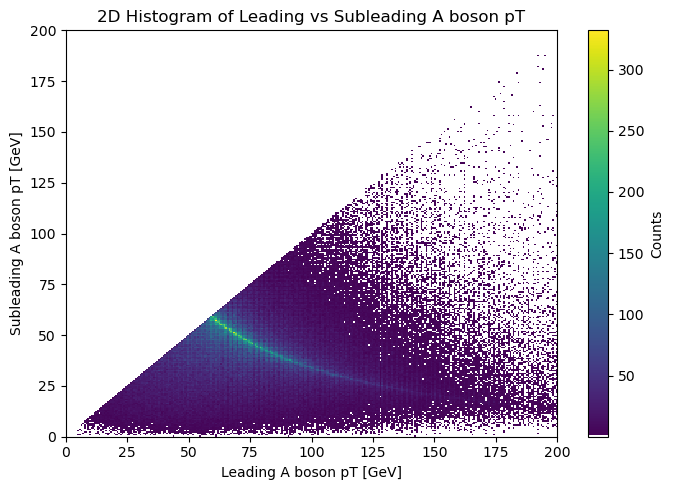

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, Normalize

mask = np.isfinite(leading_pt_np) & np.isfinite(subleading_pt_np)
leading_pt_np = leading_pt_np[mask]
subleading_pt_np = subleading_pt_np[mask]

# Convert to numpy arrays
leading_pt_np = ak.to_numpy(leading_A_pt)
subleading_pt_np = ak.to_numpy(subleading_A_pt)

# Define bin edges
x_bins = np.linspace(0, 200, 300)
y_bins = np.linspace(0, 200, 300)

# Compute histogram first
hist, xedges, yedges = np.histogram2d(leading_pt_np, subleading_pt_np, bins=[x_bins, y_bins])

# Create custom colormap with white at 0
cmap = plt.cm.viridis
newcolors = cmap(np.linspace(0, 1, 256))
newcolors[0] = [1, 1, 1, 1]  # RGBA for white
new_cmap = ListedColormap(newcolors)

# Plot manually with pcolormesh
plt.figure(figsize=(7, 5))
X, Y = np.meshgrid(xedges, yedges)
plt.pcolormesh(X, Y, hist.T, cmap=new_cmap, shading='auto', vmin=1e-5)
plt.xlabel("Leading A boson pT [GeV]")
plt.ylabel("Subleading A boson pT [GeV]")
plt.title("2D Histogram of Leading vs Subleading A boson pT")
plt.colorbar(label="Counts")
plt.tight_layout()
plt.savefig("A_pt_2D_hist_white_zero.png")
plt.show()



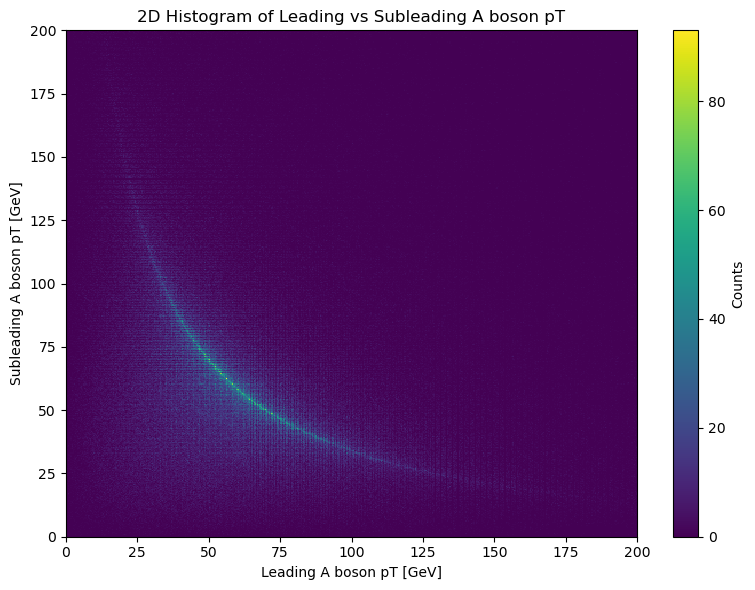

In [37]:
# Convert to NumPy arrays first
leading_pt_np = ak.to_numpy(A_pt_1)
subleading_pt_np = ak.to_numpy(A_pt_2)

# Optional: filter finite values (in case of NaNs)
# mask = np.isfinite(leading_pt_np) & np.isfinite(subleading_pt_np)
# leading_pt_np = leading_pt_np[mask]
# subleading_pt_np = subleading_pt_np[mask]

# Define bin edges
x_bins = np.linspace(0, 200, 500)
y_bins = np.linspace(0, 200, 500)

# 2D histogram
plt.figure(figsize=(8, 6))
plt.hist2d(leading_pt_np, subleading_pt_np, bins=[x_bins, y_bins], cmap='viridis')
plt.xlabel("Leading A boson pT [GeV]")
plt.ylabel("Subleading A boson pT [GeV]")
plt.title("2D Histogram of Leading vs Subleading A boson pT")
plt.colorbar(label="Counts")
plt.tight_layout()
plt.savefig("A_pt_2D_hist_random.png")
plt.show()


In [ ]:
pho_from_a_pt_1 = pho_from_a_pt[:, 0]
pho_from_a_pt_2 = pho_from_a_pt[:, 1]
pho_from_a_eta_1 = pho_from_a_eta[:, 0]
pho_from_a_eta_2 = pho_from_a_eta[:, 1]
pho_from_a_phi_1 = pho_from_a_phi[:, 0]
pho_from_a_phi_2 = pho_from_a_phi[:, 1]

sorted_photons = photons_from_a[ak.argsort(photons_from_a.pt, axis=1, ascending=False)]
lead_pt_pho_gen = sorted_photons.pt[:, 0]
sublead_pt_pho_gen = sorted_photons.pt[:, 1]
lead_eta_pho_gen = sorted_photons.eta[:, 0]
sublead_eta_pho_gen = sorted_photons.eta[:, 1]
lead_phi_pho_gen = sorted_photons.phi[:, 0]
sublead_phi_pho_gen = sorted_photons.phi[:, 1]

In [18]:
genparts

<Array [[{eta: 2.28e+04, ...}, ...], ...] type='476000 * var * {eta: float3...'>

In [6]:
ak.any(A.status != 22)

False

In [7]:
A.fields

['eta',
 'mass',
 'phi',
 'pt',
 'genPartIdxMother',
 'pdgId',
 'status',
 'statusFlags']

In [22]:
ak.any(genparts[A["genPartIdxMother"]].pdgId!=25)

False

In [26]:
ak.any(A.pt==0)

False